# lecture 6.2: Softmax classifier

- 각각의 classifier를 갖으면 복잡함
- Weight 행렬을 길게 늘여서 단일화

- 학습자 노트
  - 일딴 softmax는 logistics와 다른 알고리즘으로 생각하고 진행할 것
  - softmax는 logistics의 일반화 과정에 생성되는 알고리즘이지만 진행을 위해서 다른 것으로 간주하고 진행할 것

- 복습

![](./images/15/review.jpg)

- 3개의 classifier를 개별적으로 유지하는 것 보다 weight를 늘여서 1개의 matrix를 만드는 것이 효율적

![](./images/15/review2.jpg)

- 위 수식은 어떤 값 백터가 됨
- 각 벡터의 값은 0 ~ 1 사이의 값이 효율적

## 희망사항

![](./images/15/sigmoid.jpg)

- 각 백터 요소의 값은 활률로 변환되고
- 각 백터 요소의 확률의 합은 1인 값으로 변환되는 것이 이상적임
- softmax의 역할

- softmax 참조
  - https://www.udacity.com/course/reviewer#!/c-uc730/l-6370362152/m-6379811817

## softmax

$\left[ 
\begin{array}{cccc}  
2.0 \\
1.0 \\
0.1 \\
\end{array} 
\right] $ ==> Score   
$s(y_i) = \frac{e^{y_i}}{\sum_{i}{e^{y_i}}}$  ==> Probabilies

$\left[ 
\begin{array}{cccc}  
0.7 \\
0.2 \\
0.1 \\
\end{array} 
\right] $

![](./images/15/softmax.jpg)

![](./images/15/softmax1.jpg)

## Cross-entropy Cost function

![](./images/15/cross_entropy.png)

- softmax결과의 vector와 Label vector를 element끼로 곱함

## cost function 검증

$
D(S, L) = -\sum_{i}L_i{log(s_i)} \\
D(S, L) = -\sum_{i}{L_ilog(\hat{y}_i)} \\
D(S, L) = -\sum_{i}{ (L_i * -log(\hat{y}_i) )} \\
$

- matrix의 곱이 아닌 element의 곱

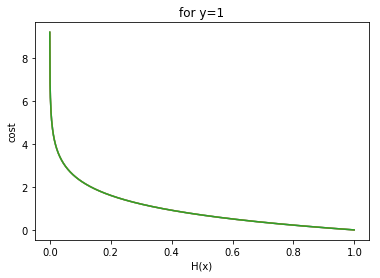

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0001, 1., 0.001)
y = -np.log(x)
plt.plot(x, y) 
plt.xlabel("H(x)")
plt.ylabel("cost")
plt.title("for y=1")
plt.show()

### example 1

$L = \left[ 
\begin{array}{cccc}  
0 \\
1 \\
\end{array} 
\right] 
$$
\hat{Y} = \left[ 
\begin{array}{cccc}  
0 \\
1 \\
\end{array} 
\right] 
$

$\sum_{i}{L_i * -log(\hat{y})}$

$\sum{
\left[ 
\begin{array}{cccc}  
0 \\
1 \\
\end{array} 
\right] \odot 
\left[ 
\begin{array}{cccc}  
0 \\
1 \\
\end{array} 
\right]}=\sum{
\left[ 
\begin{array}{cccc}  
0 * 0 \\
1 * -log(1) \\
\end{array} 
\right]}=\sum{
\left[ 
\begin{array}{cccc}  
0 * 0 \\
1 * 0 \\
\end{array} 
\right]} = \sum{
\left[ 
\begin{array}{cccc}  
0 \\
0 \\
\end{array} 
\right]}
=0
$

### example 2

$\sum{
\left[ 
\begin{array}{cccc}  
0 \\
1 \\
\end{array} 
\right] \odot 
\left[ 
\begin{array}{cccc}  
-log(1) \\
-log(0) \\
\end{array} 
\right]}=\sum{
\left[ 
\begin{array}{cccc}  
0 * 0 \\
1 * \infty \\
\end{array} 
\right]}=\sum{
\left[ 
\begin{array}{cccc}  
0     \\
\infty \\
\end{array} 
\right]} = \infty
$

### example 3

$L = \left[ 
\begin{array}{cccc}  
1 \\
0 \\
\end{array} 
\right] 
$$
\hat{Y} = \left[ 
\begin{array}{cccc}  
1 \\
0 \\
\end{array} 
\right] 
$

$\sum{
\left[ 
\begin{array}{cccc}  
1 \\
0 \\
\end{array} 
\right] \odot 
\left[ 
\begin{array}{cccc}  
-log(1) \\
-log(0) \\
\end{array} 
\right]}=\sum{
\left[ 
\begin{array}{cccc}  
1 * 0 \\
0 * \infty \\
\end{array} 
\right]}=\sum{
\left[ 
\begin{array}{cccc}  
0     \\
0 \\
\end{array} 
\right]} = 0
$

### example 4

$L = \left[ 
\begin{array}{cccc}  
1 \\
0 \\
\end{array} 
\right] 
$$
\hat{Y} = \left[ 
\begin{array}{cccc}  
0 \\
1 \\
\end{array} 
\right] 
$`

$\sum{
\left[ 
\begin{array}{cccc}  
1 \\
0 \\
\end{array} 
\right] \odot 
\left[ 
\begin{array}{cccc}  
-log(0) \\
-log(1) \\
\end{array} 
\right]}=\sum{
\left[ 
\begin{array}{cccc}  
1 * \infty \\
0 * 1 \\
\end{array} 
\right]}=\sum{
\left[ 
\begin{array}{cccc}  
\infty \\
0 \\
\end{array} 
\right]} = \infty
$

## Logistic cost function vs cross entropy cost function

$$ C(H(x), y) = ylog(H(x)-(1-y)log(1-H(x)) $$

$$D(S, L) = -\sum_{i}{L_i*log(S_i)}$$

- H(x) == S
- Y == L

## Cost Function

$$
L = \frac{1}{N}\sum_{i=1}^{N}{D(S(WX_i+b),L_i)} 
$$

- i ==> training set

## Gradient descent

![](./images/15/gd.jpg)